In [1]:
from bs4 import BeautifulSoup
from itertools import chain
from collections import Counter
from nltk.corpus import stopwords
import urllib
from lxml import html
import numpy as np
import requests
import pandas as pd
import nltk
from nltk import corpus
from nltk.stem.porter import PorterStemmer
from matplotlib import pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
import requests_cache
requests_cache.install_cache('demo_cache')
import math
from matplotlib import pyplot
import statsmodels
from scipy.interpolate import interp1d
import warnings
from statsmodels.tsa.arima_process import arma_generate_sample
import statsmodels.api
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
warnings.filterwarnings("ignore")

In [2]:
def find(state_code,par,par_1):
    url = 'http://www.quandl.com/api/v3/datasets/ZILL/'
    url = url+(par)+state_code + "_"+(par_1)
    response = requests.get(url)
    house_iv = response.json()
    house_iv = house_iv['dataset']['data']
    house_iv = pd.DataFrame(house_iv)
    return house_iv


def TimeSeries(ts):
    ts = ts.reindex(index=ts.index[::-1])
    ts.index = ts[0]
    ts.index = pd.to_datetime(ts.index)
    a = range(0,len(ts[0]))
    ts[0] = a
    result = []
    for i in ts[1]:
        i  = math.log(i)
        result.append(i)
    ts[1]  = result
    ts["firstdif"] = ts[1]-ts[1].shift(1)
    ts["seasondif"] = ts["firstdif"]-ts["firstdif"].shift(12)
    new_date_time = ts.copy()
    del ts[1]
    del ts['firstdif']
    del ts[0]
    ts= ts.dropna(inplace = False)
    res = statsmodels.tsa.stattools.arma_order_select_ic(ts, max_ar=4, max_ma=4, ic='bic', trend='c', model_kw={}, fit_kw={})
    ar = res.bic_min_order[0]
    ma = res.bic_min_order[1]
    model = ARIMA(ts,order = (ar,0,ma))
    model_fit = model.fit(disp = 0)
    forcast = model_fit.forecast(steps = 12)[0]
    new_date_time = new_date_time.dropna()
    new_res = []
    new_res_2 = []
    for i in range(0,12):
        new = forcast[i]+new_date_time["firstdif"][-12+i]
        new_res.append(new)
    
    tmp = new_res[0]+new_date_time[1][-1]
    new_res_1 = [tmp]
    for i in range(1,12):
          tmp = new_res[i]+tmp
          new_res_1.append(tmp)
    for i in new_res_1:
        new_2 = math.exp(i)
        new_res_2.append(new_2)
    return new_res_2

In [162]:
ca = find("00001","S","A")
ca_train = ca.iloc[12::]
test = (TimeSeries(ca_train))

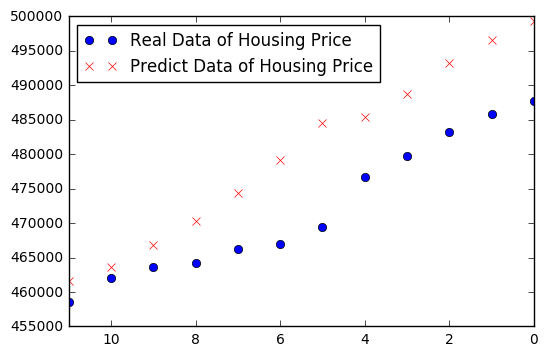

In [24]:
ca_test = pd.DataFrame((ca.iloc[0:12][1]))
ca_test = ca_test.reindex(index=ca_test.index[::-1])
ca_test[0] = test
ca_test.columns = ['Real Data of Housing Price', 'Predict Data of Housing Price']
ca_test.plot(style=['o','rx'])
plt.show()

In [158]:
ca_dat = pd.DataFrame(TimeSeries(ca))
da_dat_TR = pd.DataFrame(TimeSeries(find("00001","S","SPY")))
Mon = ["Feb","Mar","April","May","June","July","Aug","Sep","Oct","Nov","Dec","Jan"]
ca_dat["Mon"] = Mon
da_dat_TR["Mon"] = Mon

NameError: name 'TimeSeries' is not defined

In [157]:
ca_dat.plot(x = "Mon",y = 0,kind = "bar")
plt.xlabel("Month")
plt.ylabel("Housing price")
plt.title("The Housing price of 2017 In CA")
plt.show()
da_dat_TR.plot(x = "Mon",y = 0,kind = "bar")
plt.xlabel("Month")
plt.ylabel("Turn-over Rate")
plt.title("The predict turn-over rate value of 2017 In CA")
plt.show()

NameError: name 'ca_dat' is not defined

In [82]:
Final_res_co = []
Country = ["Los Angeles","San Diego","Orange","Riverside","Santa Clara","Sacramento","Fresno","San Francisco","Santa Barbara","Santa Cruz","Yolo","San Mateo","San Joaquin","Kern"]
resur_1 = []
resur_1.extend(["00001","00004","00005","00010","00015","00022","00042","00060","00140","00221","00269","00073","00078","00056"])
for i in resur_1:
    ts = find(i,"CO","A")
    Final_res_co.append(sum(TimeSeries(ts))/12)

In [5]:
Country = ["Los Angeles","San Diego","Orange","Riverside","Santa Clara","Sacramento","Fresno","San Francisco","Santa Barbara","Santa Cruz","Yolo","San Mateo","San Joaquin","Kern"]

In [83]:
Final_res_co_1 = []
for i in resur_1:
    ts = find(i,"CO","SPY")
    Final_res_co_1.append(sum(TimeSeries(ts))/12)

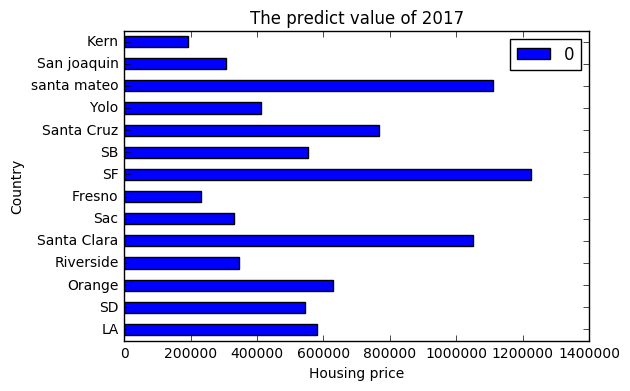

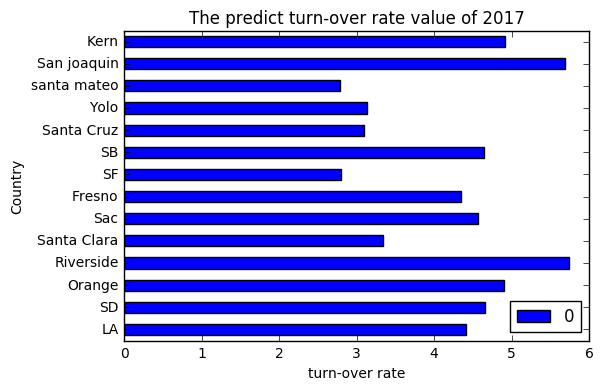

In [84]:
c = pd.DataFrame(Final_res_co,Country)
d = pd.DataFrame(Final_res_co_1,Country)
c["Country"] = Country
d["Country"] = Country
c.plot(y = 0,kind = "barh")
plt.xlabel("Housing price")
plt.ylabel("Country")
plt.title("The predict value of 2017")
plt.show()
d.plot(y = 0,kind = "barh")
plt.xlabel("turn-over rate")
plt.ylabel("Country")
plt.title("The predict turn-over rate value of 2017")
plt.show()